# INGENIERÍA DE DATOS PARA logs_entrenamiento


In [32]:
import pandas as pd

logs_entrenamiento = pd.read_csv('logs_entrenamiento.csv')


In [33]:
# Configuración de pandas
pd.set_option('display.max_columns', None) # Que se muestren todas las columnas

In [34]:
logs_entrenamiento.head()

,Unnamed: 0,username,time,event_type,grouped_event_type,chapter,sequential,label
0,90,2fb73a5b451fa1beba6a7e6c86cf66ab3d8bfa3fc256bb...,2022-08-04 21:19:49.001622+00:00,/courses/course-v1:eol+INXXXX+YYYY_Z/course/,/courses/(course-code)/course/,none_page,none_page,1
1,91,c5f32ddce577c3f4cce3bcdcb5c8e0e03933b5cc62fa18...,2022-08-04 21:27:46.305004+00:00,/courses/course-v1:eol+INXXXX+YYYY_Z/course/,/courses/(course-code)/course/,none_page,none_page,1
2,92,c5f32ddce577c3f4cce3bcdcb5c8e0e03933b5cc62fa18...,2022-08-04 21:27:47.169229+00:00,edx.bi.course.upgrade.sidebarupsell.displayed,edx.bi.course.upgrade.sidebarupsell.displayed,NaN,NaN,1
3,93,c5f32ddce577c3f4cce3bcdcb5c8e0e03933b5cc62fa18...,2022-08-04 21:29:28.915418+00:00,/courses/course-v1:eol+INXXXX+YYYY_Z/progress,/courses/(course-code)/progress,none_page,none_page,1
4,94,c5f32ddce577c3f4cce3bcdcb5c8e0e03933b5cc62fa18...,2022-08-04 21:29:28.921098+00:00,edx.ui.lms.link_clicked,edx.ui.lms.link_clicked,NaN,NaN,1


Se puede notar que los datos son de los momentos en que una persona interactúa con la página. Existen tipos de interacciones o eventos. Ellos estan asociados a una persona, una momento en el tiempo y una sección (chapter) y subsección (sequential) de página.

In [35]:
logs_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536610 entries, 0 to 536609
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          536610 non-null  int64 
 1   username            536610 non-null  object
 2   time                536610 non-null  object
 3   event_type          536610 non-null  object
 4   grouped_event_type  536610 non-null  object
 5   chapter             504699 non-null  object
 6   sequential          504699 non-null  object
 7   label               536610 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 32.8+ MB


In [36]:
# Verificamos existencia de NA's
logs_entrenamiento.isna().sum()

Unnamed: 0                0
username                  0
time                      0
event_type                0
grouped_event_type        0
chapter               31911
sequential            31911
label                     0
dtype: int64

Se observa que los NA estan asociados a las variables de chapter y sequential.

In [45]:
# Se busca los grouped_event_type asociados a chapter

valores_unicos = logs_entrenamiento[logs_entrenamiento['chapter'].isna(), 'grouped_event_type'].unique()
print(valores_unicos)

['edx.bi.course.upgrade.sidebarupsell.displayed' 'edx.ui.lms.link_clicked'
 'edx.course.home.resume_course.clicked' 'edx.course.tool.accessed']


In [47]:
# Se busca los casos únicos de grouped_event_type
valores_unicos = logs_entrenamiento['grouped_event_type'].unique()
print(valores_unicos)

['/courses/(course-code)/course/'
 'edx.bi.course.upgrade.sidebarupsell.displayed'
 '/courses/(course-code)/progress' 'edx.ui.lms.link_clicked'
 '/courses/(course-code)/(uuid-course)/'
 '/courses/(course-code)/course_wiki'
 '/courses/(course-code)/wiki/(course-code)/'
 '/courses/(course-code)/discussion/(discussion-id)/'
 '/courses/(course-code)/jump_to/(block-code)@vertical@(uuid)'
 '/courses/(course-code)/courseware/(uuid1)/(uuid2)/(tab-n)'
 '/courses/(course-code)/xblock/block-v1:(block-code)@html+block@(uuid)/handler/publish_completion'
 'edx.ui.lms.sequence.next_selected'
 '/courses/(course-code)/courseware/(uuid-code1)/(uuid-code2)/(some-path)'
 'load_video'
 '/courses/(course-code)/xblock/block-v1:(block-code)@sequential+block@(uuid)/handler/xmodule_handler/get_completion'
 '/courses/(course-code)/xblock/block-v1:(block-code)@sequential+block@(uuid)/handler/xmodule_handler/goto_position'
 'seq_goto' 'play_video' 'pause_video' 'seek_video' 'page_close'
 '/courses/(course-code)/xb

Se puede ver que los NA estan asociados a un típico específico de dato, es decir, es probable que estos NA no se deban a una falta de un dato existente, sino que, el tipo de registro asociado a edx no posee chapter ni sequential. En consecuencia, se decide no eliminar los NA

# Eliminación de outliers

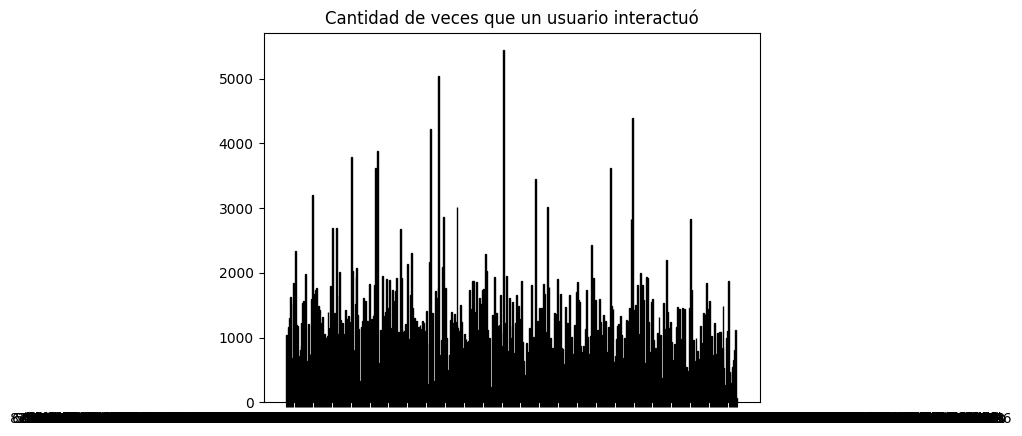

In [37]:
import matplotlib.pyplot as plt

plt.hist(logs_entrenamiento['username'], bins=500, edgecolor='black')  # 'bins' define el número de barras en el histograma

# Personaliza el título y las etiquetas de los ejes
plt.title('Cantidad de veces que un usuario interactuó')

# Muestra el histograma
plt.show()

En la eliminación de outlayers, se debe notar que es posible que aquellas personas que menos interactúan con la página, sean las personas que tienen las peores notas. Por lo tanto, se decide eliminar a los outlayers superiores únicamente.

In [44]:

# Calcula el número mínimo y máximo de registros basados en el 5% más extremo
umbral_minimo = logs_entrenamiento['username'].value_counts().quantile(0.00)
umbral_maximo = logs_entrenamiento['username'].value_counts().quantile(0.90)

# Filtra el DataFrame para eliminar las filas correspondientes
logs_entrenamiento_filtrado = logs_entrenamiento[logs_entrenamiento.groupby('username')['username'].transform('count').between(umbral_minimo, umbral_maximo)]

logs_entrenamiento_filtrado.to_csv('logs_entrenamiento_filtrado.csv', index=True)

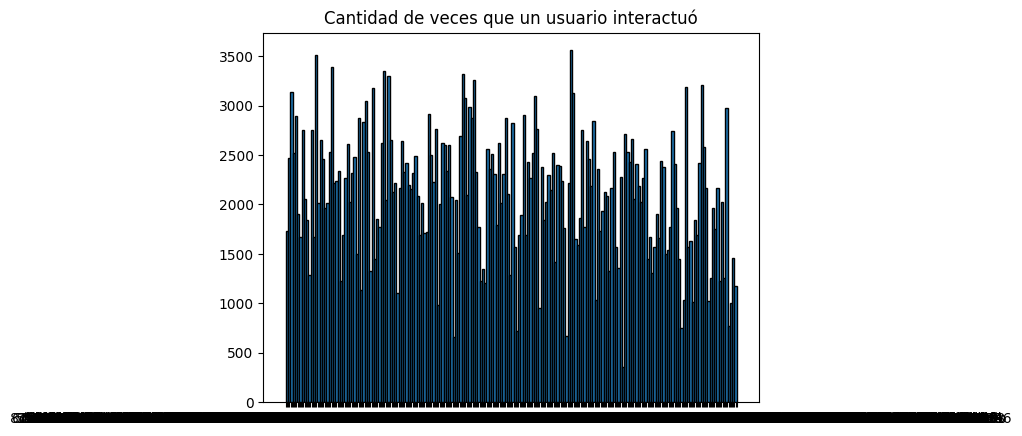

In [43]:
plt.hist(logs_entrenamiento_filtrado['username'], bins=200, edgecolor='black')  # 'bins' define el número de barras en el histograma

# Personaliza el título y las etiquetas de los ejes
plt.title('Cantidad de veces que un usuario interactuó')

# Muestra el histograma
plt.show()